<a href="https://colab.research.google.com/github/raghav5102/ML-prediction-models/blob/main/Employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict Attrition Rate of Employees

In [ ]:
import numpy as np

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('Train.csv')
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [ ]:
dft=pd.read_csv('Test.csv')
dft.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [ ]:
y_train=df['Attrition_rate']
X_train=df.drop('Attrition_rate',axis=1)


In [ ]:
X_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [ ]:
to_drop=['Employee_ID','Hometown']
X_train=X_train.drop(to_drop,axis=1)

In [ ]:
X_test=dft.drop(to_drop,axis=1)
X_test.head()

,Gender,Age,Education_Level,Relationship_Status,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,F,32.0,5,Single,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,M,65.0,2,Single,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,M,52.0,3,Married,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,M,50.0,5,Single,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,F,44.0,3,Married,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [ ]:
def unique_items(list1, list2):
  a = list1
  b = list2
  a.extend(b)
  return list(set(a))

In [ ]:
X_train.dtypes

Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_gen= LabelEncoder()
all_gen = unique_items(list(X_train['Gender']),list(X_test['Gender']))
le_gen.fit(all_gen)

le_rel= LabelEncoder()
all_rel = unique_items(list(X_train['Relationship_Status']),list(X_test['Relationship_Status']))
le_rel.fit(all_rel)

le_units= LabelEncoder()
all_units = unique_items(list(X_train['Unit']),list(X_test['Unit']))
le_units.fit(all_units)

le_dec= LabelEncoder()
all_dec = unique_items(list(X_train['Decision_skill_possess']),list(X_test['Decision_skill_possess']))
le_dec.fit(all_dec)

le_com= LabelEncoder()
all_com = unique_items(list(X_train['Compensation_and_Benefits']),list(X_test['Compensation_and_Benefits']))
le_com.fit(all_com)

LabelEncoder()

In [ ]:

X_train['Gender'] = le_gen.transform(X_train['Gender'])

X_train['Relationship_Status'] = le_rel.transform(X_train['Relationship_Status'])

X_train['Unit'] = le_units.transform(X_train['Unit'])

X_train['Decision_skill_possess'] = le_dec.transform(X_train['Decision_skill_possess'])

X_train['Compensation_and_Benefits'] = le_com.transform(X_train['Compensation_and_Benefits'])





In [ ]:
X_train.head()

,Gender,Age,Education_Level,Relationship_Status,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,42.0,4,0,2,2,4.0,4,33,1,1,7.0,2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,1,24.0,3,1,3,0,5.0,4,36,0,3,6.0,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,0,58.0,3,0,8,2,27.0,3,51,0,2,8.0,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,0,26.0,3,1,1,1,4.0,3,56,1,3,8.0,2,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,0,31.0,1,0,3,2,5.0,4,62,1,3,2.0,3,3.0,1,0.7516,-0.4537,2.0,2,8,2


In [ ]:
X_test['Gender'] = le_gen.transform(X_test['Gender'])

X_test['Relationship_Status'] = le_rel.transform(X_test['Relationship_Status'])

X_test['Unit'] = le_units.transform(X_test['Unit'])

X_test['Decision_skill_possess'] = le_dec.transform(X_test['Decision_skill_possess'])

X_test['Compensation_and_Benefits'] = le_com.transform(X_test['Compensation_and_Benefits'])


In [ ]:
X_test.head()

,Gender,Age,Education_Level,Relationship_Status,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,32.0,5,1,9,2,7.0,4,30,1,5,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,1,65.0,2,1,2,3,41.0,2,72,1,1,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,1,52.0,3,0,10,3,21.0,3,25,0,1,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,1,50.0,5,1,4,0,11.0,4,28,1,1,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,0,44.0,3,0,9,2,12.0,4,47,1,3,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
clf=RandomForestRegressor(n_estimators=5000)

In [ ]:
X_train=X_train.fillna(method='pad')
X_test=X_test.fillna(method='pad')

In [ ]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_test=clf.predict(X_test)

In [ ]:
dft['Attrition_rate']=y_test

In [ ]:
dft.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0.251976
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2,0.286989
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3,0.242059
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3,0.240989
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4,0.198148


In [ ]:
to_d=['Gender', 	'Age', 	'Education_Level', 	'Relationship_Status', 	'Hometown', 	'Unit'  , 	'Decision_skill_possess', 	'Time_of_service', 	'Time_since_promotion', 	'growth_rate' ,	'Travel_Rate', 	'Post_Level', 	'Pay_Scale' ,	'Compensation_and_Benefits', 	'Work_Life_balance' ,	'VAR1' 	,'VAR2', 	'VAR3' 	,'VAR4','VAR5' ,	'VAR6' ,	'VAR7']

In [ ]:
dft=dft.drop(to_d,axis=1)
dft.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.251976
1,EID_9658,0.286989
2,EID_22203,0.242059
3,EID_7652,0.240989
4,EID_6516,0.198148


In [ ]:
clf.score(X_train,y_train)

0.8600653190857966

In [ ]:
dft.to_csv('Employee.csv',index=False)
!cp Employee.csv "drive/My Drive/"

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(clf, X_train); 
fi


,cols,imp
8,growth_rate,0.118345
1,Age,0.091905
6,Time_of_service,0.087628
11,Pay_Scale,0.065812
4,Unit,0.065098
19,VAR6,0.046077
10,Post_Level,0.045517
2,Education_Level,0.044093
15,VAR2,0.042015
18,VAR5,0.041239


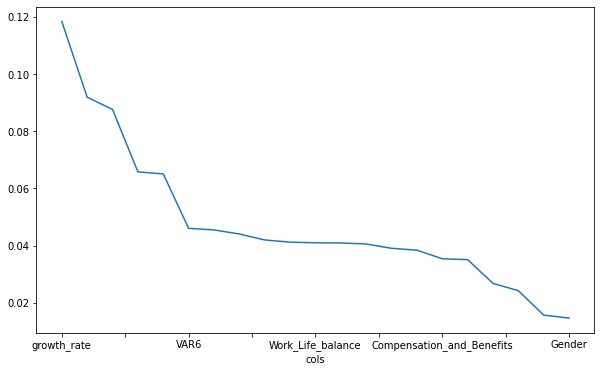

In [ ]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [ ]:
to_keep = fi[fi.imp>0.04].cols

In [ ]:
to_keep

8           growth_rate
1                   Age
6       Time_of_service
11            Pay_Scale
4                  Unit
19                 VAR6
10           Post_Level
2       Education_Level
15                 VAR2
18                 VAR5
13    Work_Life_balance
14                 VAR1
20                 VAR7
Name: cols, dtype: object

In [ ]:
X_train=X_train[to_keep]
X_train.head()

,growth_rate,Age,Time_of_service,Pay_Scale,Unit,VAR6,Post_Level,Education_Level,VAR2,VAR5,Work_Life_balance,VAR1,VAR7
0,33,42.0,4.0,7.0,2,5,1,4,0.7516,4,3.0,4,3
1,36,24.0,5.0,6.0,3,5,3,3,-0.9612,3,4.0,3,3
2,51,58.0,27.0,8.0,8,8,2,3,-0.9612,3,1.0,4,3
3,56,26.0,4.0,8.0,1,7,3,3,-1.8176,3,1.0,3,3
4,62,31.0,5.0,2.0,3,8,3,1,0.7516,2,3.0,1,2


In [ ]:
X_test=X_test[to_keep]
X_test.head()

,growth_rate,Age,Time_of_service,Pay_Scale,Unit,VAR6,Post_Level,Education_Level,VAR2,VAR5,Work_Life_balance,VAR1,VAR7
0,30,32.0,7.0,4.0,9,8,5,5,-0.9612,1,1.0,3,4
1,72,65.0,41.0,1.0,2,8,1,2,-0.9612,2,1.0,4,2
2,25,52.0,21.0,8.0,10,9,1,3,-0.1048,1,1.0,4,3
3,28,50.0,11.0,2.0,4,8,1,5,-0.1048,2,4.0,3,3
4,47,44.0,12.0,2.0,9,7,3,3,1.6081,2,4.0,4,4


In [ ]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
clf.score(X_train,y_train)

0.8589595911601906

In [ ]:
y_test=clf.predict(X_test)

In [ ]:
dft['Attritions_rate']=y_test
dft.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Attritions_rate
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4,0.248940,0.274093
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2,0.289303,0.237609
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3,0.243256,0.242017
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3,0.238684,0.218907
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4,0.203253,0.187848


In [ ]:
to_k=['Employee_ID','Attritions_rate']
dft=dft[to_k]

In [ ]:
dft.head()

,Employee_ID,Attritions_rate
0,EID_22713,0.274093
1,EID_9658,0.237609
2,EID_22203,0.242017
3,EID_7652,0.218907
4,EID_6516,0.187848


In [ ]:
dft.to_csv('Employee.csv',index=False)
!cp Employee.csv "drive/My Drive/"